# Predict the noise generated by airfoil blades

In [ ]:
# The noise generated by an aircraft is an efficiency and environmental matter for the aerospace industry.

# A vital component of the total airframe noise is the airfoil self-noise, which is due to the interaction 
# between an airfoil blade and the turbulence produced in its boundary layer and near wake.

# Performance optimization can be applied to understand the behavior of airfoils and make designs with 
# reduced noise.

# The self-noise data set used in this example was processed by NASA. It was obtained from a series 
# of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic 
# wind tunnel.

#The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. 
# The span of the airfoil and the observer position was the same in all of the experiments.

In [1]:
# This problem has the 6 following variables:

# frequency, in Hertzs, used as input.
# angle_of_attack, in degrees, used as input.
# chord_length, in meters, used as input.
# free_stream_velocity, in meters per second, used as input.
# suction_side_displacement_thickness, in meters, used as input.
# scaled_sound_pressure_level, in decibels, used as the target.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
column=["frequency","AOA","chord_length","free_stream_velocity","suction_side_displacement_thickness","scaled_sound_pressure_level"]
df = pd.read_csv("airfoil_self_noise.dat", sep='\t', skipinitialspace=True, header=None, names= column)

In [5]:
df.head()

,frequency,AOA,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# Data PreProcessing

In [6]:
df.isnull().sum()

frequency                              0
AOA                                    0
chord_length                           0
free_stream_velocity                   0
suction_side_displacement_thickness    0
scaled_sound_pressure_level            0
dtype: int64

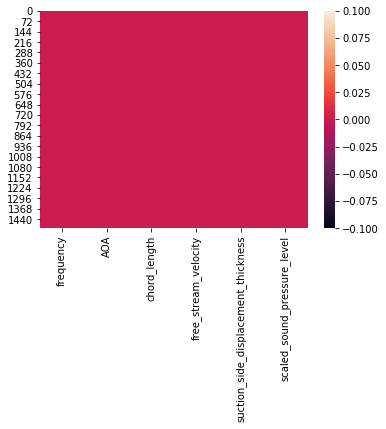

In [7]:
sns.heatmap(df.isnull(), cbar = True)

In [8]:
df.shape

(1503, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   AOA                                  1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [10]:
df.describe()

,frequency,AOA,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C4A2908>,
      dtype=object)

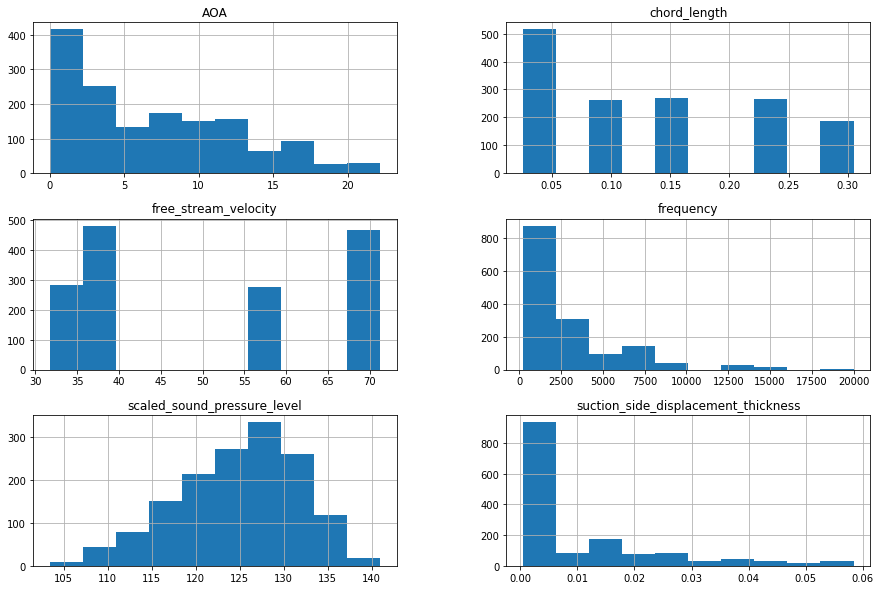

In [11]:
df.hist(figsize = (15,10))

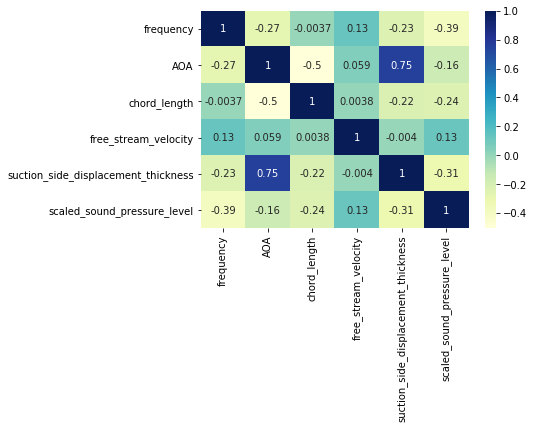

In [12]:
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

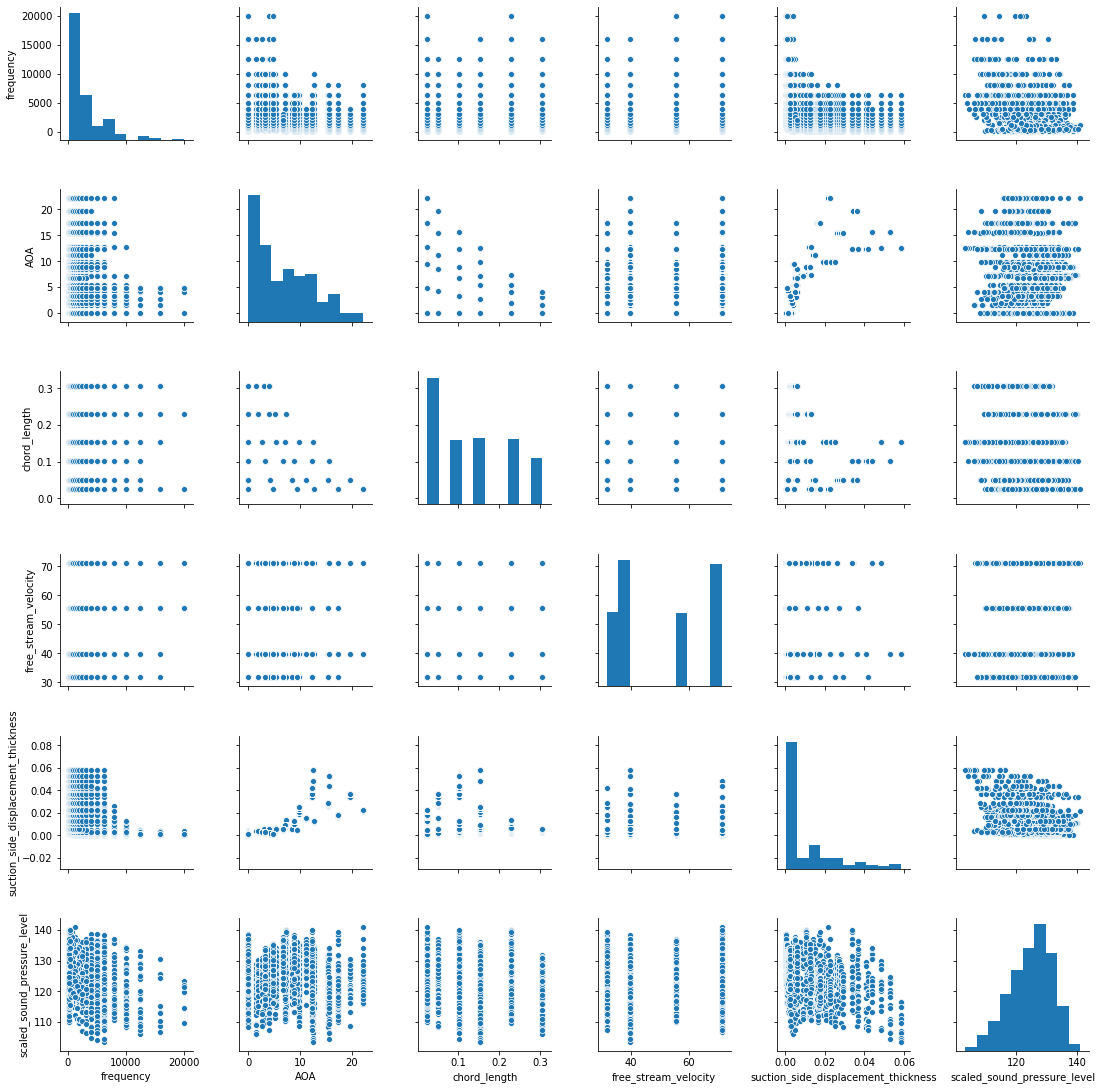

In [13]:
sns.pairplot(df)

In [14]:
# To find outliers

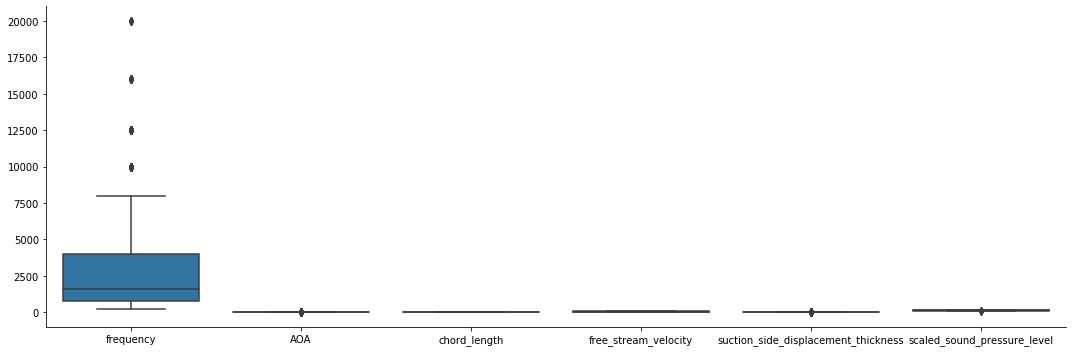

In [15]:
sns.catplot(data = df, kind = "box", aspect = 3)

In [56]:
df.frequency.value_counts()

2000     105
2500     104
3150     103
1600     103
4000     102
1250     100
1000      99
800       97
5000      95
6300      89
630       88
500       78
400       69
315       56
8000      52
10000     42
250       42
200       35
12500     25
16000     13
20000      6
Name: frequency, dtype: int64

In [58]:
df.AOA.value_counts()

0.0     329
4.0      93
15.4     65
7.3      64
12.3     64
9.9      64
17.4     63
3.0      59
2.0      56
9.5      56
5.4      55
3.3      50
4.8      50
8.4      43
12.7     34
7.2      33
6.7      33
12.6     32
8.9      32
1.5      31
2.7      30
5.3      30
15.6     30
22.2     30
11.2     28
19.7     28
4.2      21
Name: AOA, dtype: int64

# Feature Engineering

In [17]:
df1 = df.copy()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
trans = StandardScaler()
scaled = ["frequency","free_stream_velocity","scaled_sound_pressure_level"]
df1[scaled] = trans.fit_transform(df1[scaled])

In [20]:
df1.head()

,frequency,AOA,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,-0.662023,0.0,0.3048,1.312935,0.002663,0.197939
1,-0.598561,0.0,0.3048,1.312935,0.002663,0.052935
2,-0.519235,0.0,0.3048,1.312935,0.002663,0.161688
3,-0.408177,0.0,0.3048,1.312935,0.002663,0.399494
4,-0.281255,0.0,0.3048,1.312935,0.002663,0.380644


# Feature Selection

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

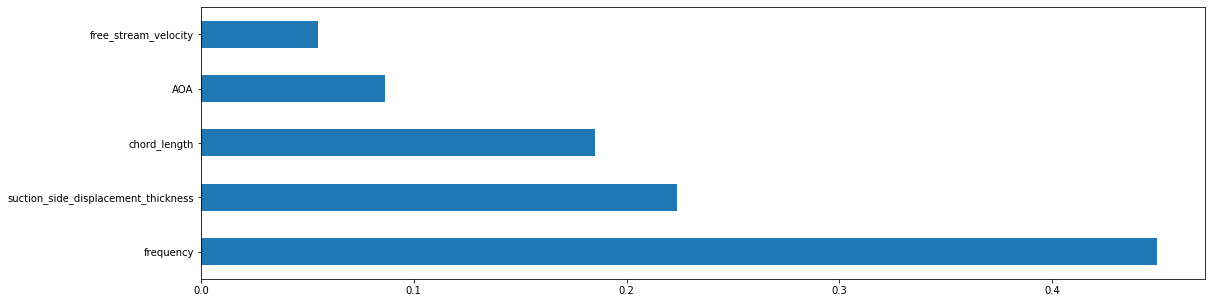

In [23]:
ext = ExtraTreesRegressor()
ext.fit(X,y)
f,ax = plt.subplots(figsize = (18,5))
feat_importances = pd.Series(ext.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = "barh")

# Model Building

In [24]:
# Train test split
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

# Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lin = LinearRegression()
lin.fit(X_train,y_train)
ypred = lin.predict(X_test)

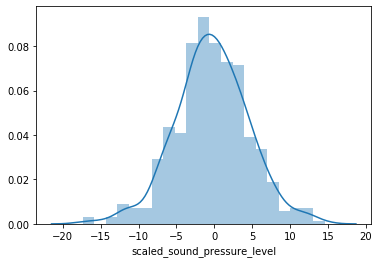

In [114]:
sns.distplot(y_test - ypred)

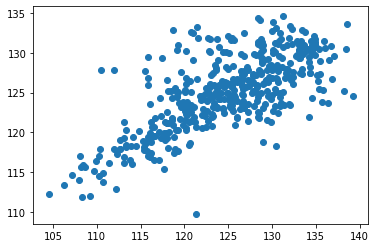

In [115]:
plt.scatter(y_test,ypred)

In [116]:
lin.score(X_train,y_train)

0.5214416938715567

In [30]:
from sklearn import metrics

In [118]:
print(metrics.mean_absolute_error(y_test,ypred))
print(metrics.mean_squared_error(y_test,ypred))
print(np.sqrt(metrics.mean_squared_error(y_test,ypred)))
metrics.r2_score(y_test,ypred)

3.7761801748855
23.687858290026227
4.867017391588633


0.4982726587932882

# Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
ypred1 = rfr.predict(X_test)

In [31]:
print(rfr.score(X_train,y_train))
print(metrics.mean_absolute_error(y_test,ypred1))
print(metrics.mean_squared_error(y_test,ypred1))
print(np.sqrt(metrics.mean_squared_error(y_test,ypred1)))
print(metrics.r2_score(y_test,ypred1))

0.9893806456477565
1.3368076053215037
3.3420677564068657
1.8281323137034873
0.9292123944248385


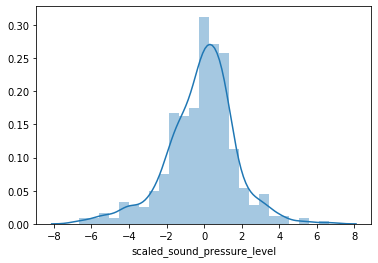

In [32]:
sns.distplot(y_test - ypred1)

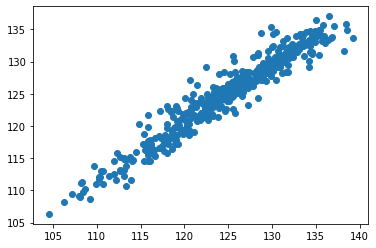

In [33]:
plt.scatter(y_test,ypred1)

In [ ]:
# Checking with 1st row elements of df dataframe

In [51]:
listt = list(X.iloc[0,:])

In [52]:
listt

[800.0, 0.0, 0.3048, 71.3, 0.00266337]

In [44]:
rfr.predict([listt])

array([126.3788])

In [46]:
y.iloc[0]

126.20100000000001

In [47]:
# looks like predicted value is similar to original value(scaled_sound_pressure_level) in decibels

In [48]:
# Checking for new values

In [ ]:
# frequency                              1000.000000
# AOA                                      5.00
# chord_length                             0.48
# free_stream_velocity                    70.00
# suction_side_displacement_thickness      0.003

In [54]:
predictt = [1000,5,0.48,70,0.003]

In [55]:
rfr.predict([predictt])

array([132.16924])